## Coding Exercise #0608

In [1]:
# Install WordCloud once.
# !pip install wordcloud

In [2]:
from wordcloud import WordCloud
import numpy as np
import nltk
import re
import os
import matplotlib.pyplot as plt
from PIL import Image                         # From the Pillow library import the Image module.
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
%matplotlib inline

In [3]:
%%time
# Download NLTK data.
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


CPU times: user 429 ms, sys: 134 ms, total: 563 ms
Wall time: 908 ms


True

### 1. Visualize the text data as a WordCloud:

In [4]:
!wget --no-clobber https://raw.githubusercontent.com/tn-220/SIC-Machine-Learning/main/SIC_ML_Coding_Exercises/SIC_ML_Chapter_07_Coding_Exercises/book_three_little_pigs.txt

--2024-06-14 14:18:30--  https://raw.githubusercontent.com/tn-220/SIC-Machine-Learning/main/SIC_ML_Coding_Exercises/SIC_ML_Chapter_07_Coding_Exercises/book_three_little_pigs.txt
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.110.133, 185.199.109.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 4745 (4.6K) [text/plain]
Saving to: ‘book_three_little_pigs.txt’

book_three_little_p 100%[===================>]   4.63K  --.-KB/s    in 0s      

2024-06-14 14:18:30 (54.8 MB/s) - ‘book_three_little_pigs.txt’ saved [4745/4745]



In [5]:
f = open("./book_three_little_pigs.txt",'r',encoding='UTF8')
my_book = f.readlines()
f.close()

#### 1.1. Pre-processing:

In [6]:
n_min = 4                                                           # Minimum number of characters.
corpus = []
lemmatizer = WordNetLemmatizer()
for a_line in my_book:
    pre = re.sub(r'\W', ' ', a_line)                                # Substitute the non-alphanumerics character by space.
    pre = re.sub(r'\d+','', pre)                                    # Remove numbers.
    pre = nltk.word_tokenize(pre)                                   # Tokenize into words.
    pre = [x for x in pre if len(x) > n_min]                        # Minimum length.
    pre = [x.lower() for x in pre]                                  # Convert into the lowercase.
    pre = [x for x in pre if x not in stopwords.words('english')]   # Remove stopwords.
    pre = [lemmatizer.lemmatize(x) for x in pre]                    # Lemmatize.
    corpus += pre                                                   # Back to the corpus.

In [7]:
len(corpus)

184

#### 1.2. Generate a basic wordcloud:

In [8]:
# WordCloud requires that the imput data be a single long string.
a_long_sentence = ' '.join(corpus)

In [9]:
wc = WordCloud(background_color='white', max_words=30)              # Customize the output.
wc.generate(a_long_sentence)
# wc.words_                                                          # Check for the top ranking words.

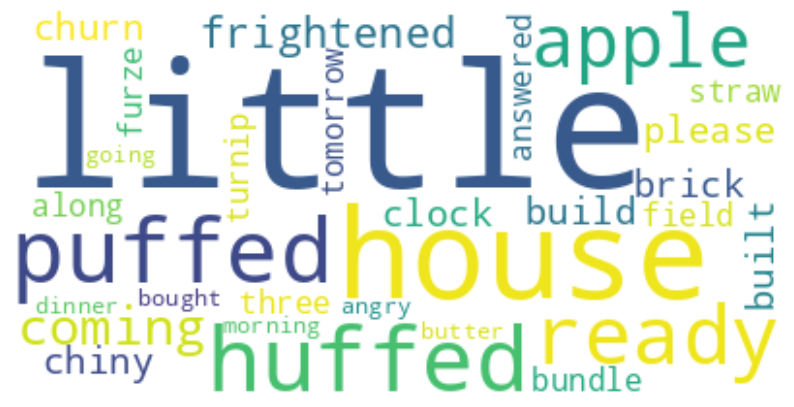

In [10]:
plt.figure(figsize=(10,10))
plt.imshow(wc, interpolation='bilinear')
plt.axis("off")                                    # Turn off the axes.
plt.show()

#### 1.3. Generate wordcloud using a mask:

In [11]:
!wget --no-clobber https://github.com/tn-220/SIC-Machine-Learning/raw/main/SIC_ML_Coding_Exercises/SIC_ML_Chapter_07_Coding_Exercises/background_1.png
!wget --no-clobber https://github.com/tn-220/SIC-Machine-Learning/raw/main/SIC_ML_Coding_Exercises/SIC_ML_Chapter_07_Coding_Exercises/background_2.png
!wget --no-clobber https://github.com/tn-220/SIC-Machine-Learning/raw/main/SIC_ML_Coding_Exercises/SIC_ML_Chapter_07_Coding_Exercises/background_3.png
!wget --no-clobber https://github.com/tn-220/SIC-Machine-Learning/raw/main/SIC_ML_Coding_Exercises/SIC_ML_Chapter_07_Coding_Exercises/background_4.png

--2024-06-14 14:18:36--  https://github.com/tn-220/SIC-Machine-Learning/raw/main/SIC_ML_Coding_Exercises/SIC_ML_Chapter_07_Coding_Exercises/background_1.png
Resolving github.com (github.com)... 140.82.112.3
Connecting to github.com (github.com)|140.82.112.3|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/tn-220/SIC-Machine-Learning/main/SIC_ML_Coding_Exercises/SIC_ML_Chapter_07_Coding_Exercises/background_1.png [following]
--2024-06-14 14:18:36--  https://raw.githubusercontent.com/tn-220/SIC-Machine-Learning/main/SIC_ML_Coding_Exercises/SIC_ML_Chapter_07_Coding_Exercises/background_1.png
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 6414 (6.3K) [image/png]
Saving to: ‘background_1.png’

backg

In [12]:
# Pick a background mask.
#img = Image.open('background_1.png')                    # Elipse.
#img = Image.open('background_2.png')                   # Speech bubble.
#img = Image.open('background_3.png')                    # Heart.
img = Image.open('background_4.png')                    # Circle.
back_mask = np.array(img)

In [13]:
wc = WordCloud(background_color='white', max_words=30, mask=back_mask)            # Customize the output.
wc.generate(a_long_sentence)

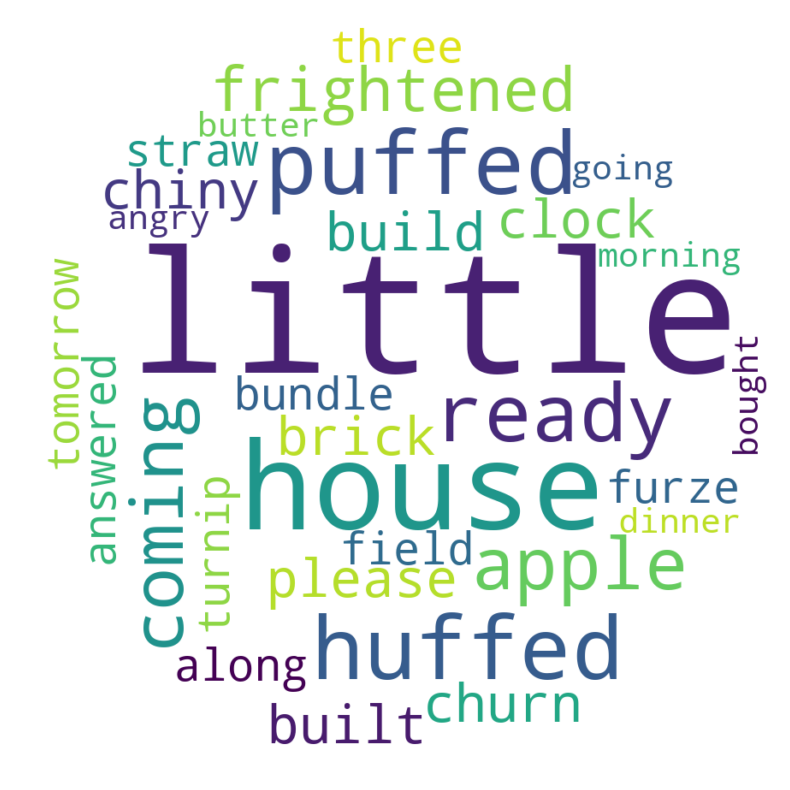

In [14]:
plt.figure(figsize=(10,10))
plt.imshow(wc, interpolation='bilinear')
plt.axis("off")                                    # Turn off the axes.
plt.savefig("out.png")                             # Save to an external file.
plt.show()